In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df=pd.read_csv('data.csv',encoding= 'unicode_escape')

In [100]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [101]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [102]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [103]:
ukdf=df[df['Country']=='United Kingdom']
ukdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [104]:
ukdf.shape

(495478, 8)

In [105]:
ukdf=ukdf[ukdf['Quantity']>0]
ukdf.shape

(486286, 8)

In [106]:
ukdf['Description'].value_counts().to_frame().head()

,Description
WHITE HANGING HEART T-LIGHT HOLDER,2231
JUMBO BAG RED RETROSPOT,1960
REGENCY CAKESTAND 3 TIER,1711
PARTY BUNTING,1615
LUNCH BAG RED RETROSPOT,1421


In [107]:
ukdf.dropna(subset=['CustomerID'],how='all',inplace=True)
ukdf.shape

(354345, 8)

In [108]:
print('Number of transaction:- ',ukdf['InvoiceNo'].nunique())
print('Number of bought product:- ',ukdf['StockCode'].nunique())
print('Number of customers:- ',ukdf['CustomerID'].nunique())

Number of transaction:-  16649
Number of bought product:-  3645
Number of customers:-  3921


#Recensy

Last date of purchase

In [109]:
ukdf['InvoiceDate'].max()

'9/9/2011 9:52'

We will use above date as a reference

In [110]:
import datetime as dt

In [111]:
td=dt.date(2011,12,9)
print(td)

2011-12-09


Creating a new date column

In [112]:
ukdf['date']=pd.DatetimeIndex(ukdf['InvoiceDate']).date

In [113]:
ukdf.head(n=2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [114]:
rdf=ukdf.groupby('CustomerID',as_index=False)['date'].max()
rdf.columns=['CustomerID','LastPurchaseDate']
rdf.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [115]:
rdf['Recency'] = rdf['LastPurchaseDate'].apply(lambda x: (td - x).days)

In [116]:
rdf .head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [117]:
rdf.drop('LastPurchaseDate',inplace=True,axis=1)

#frequency

In [118]:
ukdfcopy=ukdf.copy()

In [119]:
ukdfcopy.drop_duplicates(subset=['InvoiceNo','CustomerID'],inplace=True,keep='first')

In [120]:
fdf=ukdfcopy.groupby(by=['CustomerID'],as_index=False)['InvoiceNo'].count()
fdf.columns=['CustomerID','Frequency']
fdf.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,210
3,12749.0,5
4,12820.0,4


In [121]:
fdf.sort_values('Frequency',ascending=False).head()

,CustomerID,Frequency
2,12748.0,210
3594,17841.0,124
191,13089.0,97
1268,14606.0,93
1772,15311.0,91


<Axes: xlabel='CustomerID', ylabel='Frequency'>

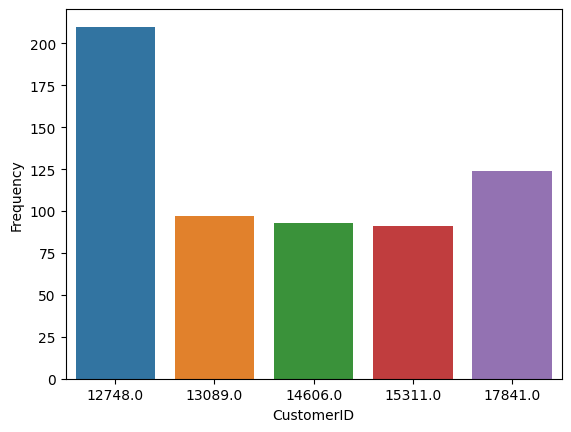

In [122]:
sns.barplot(data=fdf.sort_values('Frequency',ascending=False).head(),x='CustomerID',y='Frequency')

#Monetary

In [123]:
ukdf['TotalCost']=ukdf['Quantity']*ukdf['UnitPrice']
ukdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [124]:
mdf=ukdf.groupby('CustomerID',as_index=False).agg({'TotalCost':'sum'})

In [125]:
mdf.columns=['CustomerID','Monetary']
mdf.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


#Creating RFM table

In [126]:
tdf=rdf.merge(fdf,on='CustomerID')
tdf.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,11
2,12748.0,0,210
3,12749.0,3,5
4,12820.0,3,4


In [127]:
tdf2=tdf.merge(mdf,on='CustomerID')

In [133]:
tdf2.set_index('CustomerID',inplace=True)
tdf2.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,4196.01
12748.0,0,210,33719.73
12749.0,3,5,4090.88
12820.0,3,4,942.34


In [132]:
tdf2.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3911, 3912, 3913, 3914, 3915, 3916, 3917, 3918, 3919, 3920],
           dtype='int64', length=3921)

#RFM Segmentation

In [134]:
qnt=tdf2.quantile(q=[0.25,0.5,0.75])
qnt

,Recency,Frequency,Monetary
0.25,17.0,1.0,300.04
0.50,50.0,2.0,651.82
0.75,142.0,5.0,1575.89


Creating RFM

Defining quantile score 1-4

In [135]:
qnt.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 300.04, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [137]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [139]:
rfm_segmentation = tdf2
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',qnt,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',qnt,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',qnt,))

In [140]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12747.0,2,11,4196.01,4,4,4
12748.0,0,210,33719.73,4,4,4
12749.0,3,5,4090.88,4,3,4
12820.0,3,4,942.34,4,3,3


In [141]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12747.0,2,11,4196.01,4,4,4,444
12748.0,0,210,33719.73,4,4,4,444
12749.0,3,5,4090.88,4,3,4,434
12820.0,3,4,942.34,4,3,3,433


In [142]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
18102.0,0,60,259657.30,4,4,4,444
17450.0,8,46,194550.79,4,4,4,444
17511.0,2,31,91062.38,4,4,4,444
16684.0,4,28,66653.56,4,4,4,444
14096.0,4,17,65164.79,4,4,4,444
13694.0,3,50,65039.62,4,4,4,444
15311.0,0,91,60767.90,4,4,4,444
13089.0,2,97,58825.83,4,4,4,444
17949.0,1,45,58510.48,4,4,4,444


In [143]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
18102.0,0,60,259657.30,4,4,4,444
17450.0,8,46,194550.79,4,4,4,444
17511.0,2,31,91062.38,4,4,4,444
16684.0,4,28,66653.56,4,4,4,444
14096.0,4,17,65164.79,4,4,4,444
13694.0,3,50,65039.62,4,4,4,444
15311.0,0,91,60767.90,4,4,4,444
13089.0,2,97,58825.83,4,4,4,444
17949.0,1,45,58510.48,4,4,4,444


In [144]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  423
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  65
Lost Customers:  13
Lost Cheap Customers:  396
